# Merging the ATO Dataset with the Postcode Data

In [1]:
# import package
import pandas as pd

In [2]:
# Assign the link to the ATO dataset 
url_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter12/Dataset/taxstats2015.csv'

In [3]:
# load the data
df = pd.read_csv(url_path)
df.head()

,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Median total business income,Count total business expenses,Average total business expenses,Median total business expenses,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
0,2000,36185,47723,18213,31293,38710,17992,3614,558,207,...,19684,1331,222191,20773,17264,27555,5917,51394,68531,1110
1,2006,83,80905,58150,74,82733,67658,21,1042,-807,...,42054,4,48971,18508,67,28142,19359,137,90315,15544
2,2007,4769,46549,31474,4153,47386,34366,548,-1242,-794,...,19960,334,639499,9233,3071,15649,9115,6711,41670,5225
3,2008,5607,108816,41151,5008,53418,42892,612,1818,-1728,...,19722,481,32173,9385,4061,53976,10583,7676,54245,10373
4,2009,9726,82938,50604,8167,74068,55243,1714,-2412,-1520,...,26044,666,222993,11982,7358,32430,14835,12718,126486,20494


In [4]:
# Display the dimensions of this DataFrame
df.shape

(2473, 28)

Both DataFrames have a column called Postcode containing postcodes, so we will use it to merge them together.

In [5]:
# Display the number of unique values for the Postcode variable
df['Postcode'].nunique()

2473

In [6]:
# assign the link to the second Postcode dataset to a variable called postcode_df
postcode_url = 'https://github.com/PacktWorkshops/The-Data-Science-Workshop/blob/'\
               'master/Chapter12/Dataset/taxstats2016individual06taxablestatusstate'\
               'territorypostcodetaxableincome%20(2).xlsx?raw=true'

postcode_df = pd.read_excel(postcode_url, sheet_name='Individuals Table 6B', header=2)
postcode_df.head()

,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3 \nno.,Taxable income or loss3 \n$,Tax on taxable income \nno.,Tax on taxable income \n$,Medicare levy \nno.,Medicare levy \n$,Medicare levy surcharge \nno.,...,Small business income tax offset \n$,Low income tax offset \nno.,Low income tax offset \n$,People with private health insurance \nno.,Private health insurance - your Australian Government rebate received \nno.,Private health insurance - your Australian Government rebate received \n$,Private health insurance rebate \nno.,Private health insurance rebate \n$,Excess private health reduction or refund (rebate reduced) \nno.,Excess private health reduction or refund (rebate reduced) \n$
0,ACT,2600,5581,5557,569612119,4905,163820305,4384,10548612,119,...,125198,1812,527925,4597,3557,2662024,440,185991,1663,854227
1,ACT,2601,2658,2637,183288078,1941,46542933,1660,3203840,88,...,30823,812,250431,1637,1141,630696,213,63883,481,173475
2,ACT,2602,19457,19367,1379212924,16595,326786223,14594,24937105,565,...,212891,7623,2306744,13434,10610,6369968,1461,474942,3812,1381661
3,ACT,2603,6478,6439,796053195,5701,249451322,5176,15002971,131,...,149987,2056,611022,5193,3913,2761608,442,154634,1849,1004593
4,ACT,2604,7387,7341,637350002,6534,165676071,5787,11512325,248,...,73942,2391,673244,5465,4356,2632078,552,175697,1885,754097


In [7]:
# Print the dimensions of postcode_df
postcode_df.shape

(2567, 150)

In [8]:
# Print the number of unique values in the 'Postcode' column
postcode_df['Postcode'].nunique()

2567

In [9]:
# Perform a left join on the two DataFrames 
merged_df = pd.merge(df, postcode_df, how='left', on='Postcode')
merged_df.head()

,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Small business income tax offset \n$,Low income tax offset \nno.,Low income tax offset \n$,People with private health insurance \nno.,Private health insurance - your Australian Government rebate received \nno.,Private health insurance - your Australian Government rebate received \n$,Private health insurance rebate \nno.,Private health insurance rebate \n$,Excess private health reduction or refund (rebate reduced) \nno.,Excess private health reduction or refund (rebate reduced) \n$
0,2000,36185,47723,18213,31293,38710,17992,3614,558,207,...,273962.0,10143.0,3466009.0,7710.0,5875.0,3815543.0,984.0,234746.0,2358.0,1248220.0
1,2006,83,80905,58150,74,82733,67658,21,1042,-807,...,396.0,26.0,7825.0,53.0,37.0,25403.0,7.0,1694.0,18.0,10150.0
2,2007,4769,46549,31474,4153,47386,34366,548,-1242,-794,...,31587.0,2200.0,716233.0,1763.0,1394.0,744748.0,227.0,45656.0,453.0,167480.0
3,2008,5607,108816,41151,5008,53418,42892,612,1818,-1728,...,71139.0,2690.0,854648.0,2678.0,2019.0,1044569.0,398.0,85465.0,667.0,226170.0
4,2009,9726,82938,50604,8167,74068,55243,1714,-2412,-1520,...,114828.0,3739.0,1146253.0,5628.0,4415.0,2779136.0,768.0,207962.0,1864.0,887040.0


In [10]:
# Print the dimensions of the new merged DataFrame
merged_df.shape

(2473, 177)

We want to see whether there are any postcodes that didn't match between the two datasets. To do so, we will be looking at one column from the right-hand side DataFrame (the Postcode dataset) and see if there are any missing values.

In [11]:
# Print the total number of missing values from the 'State/Territory1' column
merged_df['State/ Territory1'].isna().sum()

4

In [12]:
# Print the missing postcodes
merged_df.loc[merged_df['State/ Territory1'].isna(), 'Postcode']

631     3010
1494    4462
2072    6068
2332    6758
Name: Postcode, dtype: object

# Binning the YearBuilt Variable from the AMES Housing Dataset

In [13]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# url path
url_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter12/Dataset/ames_iowa_housing.csv'

In [15]:
# load the data
df = pd.read_csv(url_path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
# Display the number of unique values on the column
df['YearBuilt'].nunique()

112

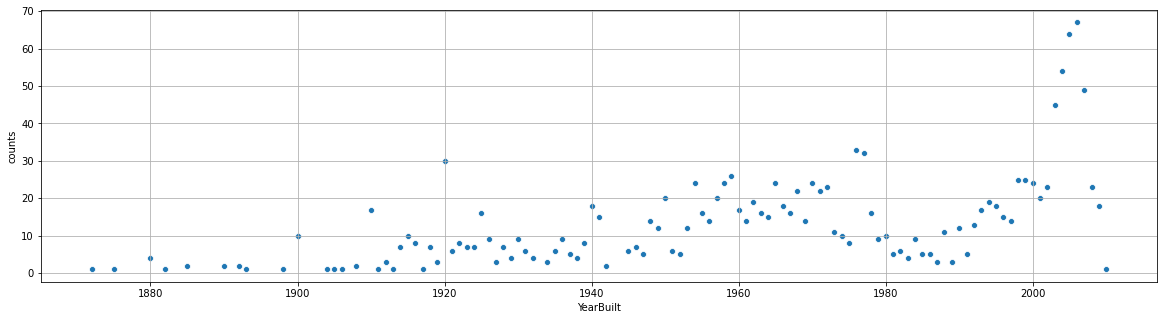

In [17]:
# Print a scatter plot to visualize the number of records built per year
new_df = pd.DataFrame()
new_df['counts'] = df['YearBuilt'].value_counts()
new_df['YearBuilt'] = new_df.index

plt.figure(figsize=(20, 5))
sns.scatterplot(new_df['YearBuilt'], new_df['counts'])
plt.grid()
plt.show()

In [18]:
# Create a list called year_built containing all the unique values in the YearBuilt column
year_built = df['YearBuilt'].unique()

In [19]:
# Create another list that will compute the decade for each year in year_built
decade_list = [year - (year % 10) for year in year_built]
decade_list = sorted(set(decade_list))
decade_list

[1870,
 1880,
 1890,
 1900,
 1910,
 1920,
 1930,
 1940,
 1950,
 1960,
 1970,
 1980,
 1990,
 2000,
 2010]

In [20]:
# Create a new column on the df DataFrame called DecadeBuilt that will bin each value from YearBuilt into a decade
df['DecadeBuilt'] = pd.cut(df['YearBuilt'], bins=decade_list)

In [21]:
# Print the first five rows of the DataFrame but only for the 'YearBuilt' and 'DecadeBuilt' columns
df[['YearBuilt', 'DecadeBuilt']].head()

,YearBuilt,DecadeBuilt
0,2003,"(2000, 2010]"
1,1976,"(1970, 1980]"
2,2001,"(2000, 2010]"
3,1915,"(1910, 1920]"
4,2000,"(1990, 2000]"


# Date Manipulation on Financial Services Consumer Complaints

In [22]:
# url path
url_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter12/Dataset/Consumer_Complaints.csv'

In [23]:
# load the data
df = pd.read_csv(url_path)
df.head()

C:\Users\Hevans\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1114245,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,FL,32219.0,Web,11/13/2014,11/13/2014,"Choice Recovery, Inc.",Closed with explanation,Yes,NaN
1,1114488,Debt collection,Medical,Disclosure verification of debt,Right to dispute notice not received,TX,75006.0,Web,11/13/2014,11/13/2014,"Expert Global Solutions, Inc.",In progress,Yes,NaN
2,1114255,Bank account or service,Checking account,Deposits and withdrawals,NaN,NY,11102.0,Web,11/13/2014,11/13/2014,"FNIS (Fidelity National Information Services, ...",In progress,Yes,NaN
3,1115106,Debt collection,"Other (phone, health club, etc.)",Communication tactics,Frequent or repeated calls,GA,31721.0,Web,11/13/2014,11/13/2014,"Expert Global Solutions, Inc.",In progress,Yes,NaN
4,1115890,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,FL,33461.0,Web,11/12/2014,11/13/2014,TransUnion,In progress,Yes,NaN


In [24]:
# Print out the data types for each column
df.dtypes

Complaint ID              int64
Product                  object
Sub-product              object
Issue                    object
Sub-issue                object
State                    object
ZIP code                float64
Submitted via            object
Date received            object
Date sent to company     object
Company                  object
Company response         object
Timely response?         object
Consumer disputed?       object
dtype: object

In [25]:
# Convert the 'Date received' and 'Date sent to company' columns to datetime
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

In [26]:
# Print out the data types for each column
df.dtypes

Complaint ID                     int64
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
State                           object
ZIP code                       float64
Submitted via                   object
Date received           datetime64[ns]
Date sent to company    datetime64[ns]
Company                         object
Company response                object
Timely response?                object
Consumer disputed?              object
dtype: object

In [27]:
# Create a new column which will contain the year of each date from the 'Date Received' column
df['YearReceived'] = df['Date received'].dt.year

In [28]:
# Create a new column which will contain the month of each date
df['MonthReceived'] = df['Date received'].dt.month

In [29]:
# Create a new column which will contain the day of the month
df['DayReceived'] = df['Date received'].dt.day

In [30]:
# Create a new column which will contain the day of the week 
df['DowReceived'] = df['Date received'].dt.dayofweek

In [31]:
# Create a new column which will contain binary values indicating whether the DowReceived column
# is over or equal to 5 (0 corresponds to Monday, 5 and 6 correspond to Saturday and Sunday respectively
df['IsWeekendReceived'] = df['DowReceived'] >= 5

In [32]:
# Create a new column which will contain the difference between 'Date sent to company' and 'Date received'
df['RoutingDays'] = df['Date sent to company'] - df['Date received']

In [33]:
df['RoutingDays'].dtypes

dtype('<m8[ns]')

The result of subtracting two datetime columns is a new datetime column (dtype('<M8[ns]'), which is a specific datetime type for the numpy package). We need to convert this data type into an int to get the number of days between these two days.

In [34]:
# Transform the RoutingDays column
df['RoutingDays'] = df['RoutingDays'].dt.days

In [35]:
df.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,YearReceived,MonthReceived,DayReceived,DowReceived,IsWeekendReceived,RoutingDays
0,1114245,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,FL,32219.0,Web,2014-11-13,2014-11-13,"Choice Recovery, Inc.",Closed with explanation,Yes,NaN,2014,11,13,3,False,0
1,1114488,Debt collection,Medical,Disclosure verification of debt,Right to dispute notice not received,TX,75006.0,Web,2014-11-13,2014-11-13,"Expert Global Solutions, Inc.",In progress,Yes,NaN,2014,11,13,3,False,0
2,1114255,Bank account or service,Checking account,Deposits and withdrawals,NaN,NY,11102.0,Web,2014-11-13,2014-11-13,"FNIS (Fidelity National Information Services, ...",In progress,Yes,NaN,2014,11,13,3,False,0
3,1115106,Debt collection,"Other (phone, health club, etc.)",Communication tactics,Frequent or repeated calls,GA,31721.0,Web,2014-11-13,2014-11-13,"Expert Global Solutions, Inc.",In progress,Yes,NaN,2014,11,13,3,False,0
4,1115890,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,FL,33461.0,Web,2014-11-12,2014-11-13,TransUnion,In progress,Yes,NaN,2014,11,12,2,False,1


# Feature Engineering Using Data Aggregation on the AMES Housing Dataset

We will create new features using data aggregation. First, we'll calculate the maximum SalePrice and LotArea for each neighborhood and by YrSold. Then, we will add this information back to the dataset, and finally, we will calculate the ratio of each property sold with these two maximum values

In [36]:
# url path
url_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter12/Dataset/ames_iowa_housing.csv'

In [37]:
# load the data
df = pd.read_csv(url_path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
# Perform data aggregation to find the maximum SalePrice for each Neighborhood and the YrSold
df_agg = df.groupby(['Neighborhood', 'YrSold']).agg({'SalePrice': 'max'}).reset_index()
df_agg

,Neighborhood,YrSold,SalePrice
0,Blmngtn,2006,264561
1,Blmngtn,2007,194201
2,Blmngtn,2008,191000
3,Blmngtn,2009,192500
4,Blmngtn,2010,192000
...,...,...,...
114,Timber,2009,375000
115,Timber,2010,378500
116,Veenker,2006,385000
117,Veenker,2007,294000


In [39]:
# Rename the df_agg columns to Neighborhood, YrSold, and SalePriceMax
df_agg.columns = ['Neighborhood', 'YrSold', 'SalePriceMax']
df_agg.columns

Index(['Neighborhood', 'YrSold', 'SalePriceMax'], dtype='object')

In [40]:
# Merge the original DataFrame, df, to df_agg using a left join on the Neighborhood and YrSold columns
new_df = pd.merge(df, df_agg, how='left', on=['Neighborhood', 'YrSold'])
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceMax
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,287000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,294000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,287000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,250000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,350000


In [41]:
# Create a new column called SalePriceRatio by dividing SalePrice by SalePriceMax
new_df['SalePriceRatio'] = new_df['SalePrice'] / new_df['SalePriceMax']
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceMax,SalePriceRatio
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,287000,0.726481
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,294000,0.617347
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,287000,0.778746
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,250000,0.560000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,350000,0.714286


In [42]:
# Perform data aggregation to find the maximum LotArea for each Neighborhood and YrSold
df_agg2 = df.groupby(['Neighborhood', 'YrSold']).agg({'LotArea':'max'}).reset_index()

In [43]:
# Rename the column of df_agg2 to Neighborhood, YrSold, and LotAreaMax
df_agg2.columns = ['Neighborhood', 'YrSold', 'LotAreaMax']
df_agg2.head()

,Neighborhood,YrSold,LotAreaMax
0,Blmngtn,2006,4045
1,Blmngtn,2007,3922
2,Blmngtn,2008,3182
3,Blmngtn,2009,3684
4,Blmngtn,2010,3182


In [44]:
# Merge the original DataFrame, df, to df_agg2 using a left join on the Neighborhood and YrSold 
df_final = pd.merge(df, df_agg2, how='left', on=['Neighborhood', 'YrSold'])

In [45]:
# Create a new column called LotAreaRatio by dividing LotArea by LotAreaMax
df_final['LotAreaRatio'] = df_final['LotArea'] / df_final['LotAreaMax']

In [46]:
df_final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotAreaMax,LotAreaRatio
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,13125,0.643810
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,17542,0.547258
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,13125,0.857143
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,16560,0.576691
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,14303,0.996994
